Avacado Project
Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

To download the dataset, use the link given below. 

In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import pickle

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

In [218]:
df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [219]:
 df.drop(["Unnamed: 0"], axis=1,inplace = True)
    

In [220]:
df


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [221]:
df.shape

(18249, 13)

Total number of rows are 18249 and columns are 13

In [222]:
df.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [223]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [224]:
df.sample()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
4256,2016-02-21,0.89,263057.19,142078.71,31665.87,322.0,88990.61,71315.06,17675.55,0.0,conventional,2016,NewOrleansMobile


In [225]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There is no null values

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


All columns have numerical values except "Date","Type", "Region"(object type i.e string)

In [227]:
#looking over all features
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [228]:
df.nunique() # overview of unique values of each column


Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

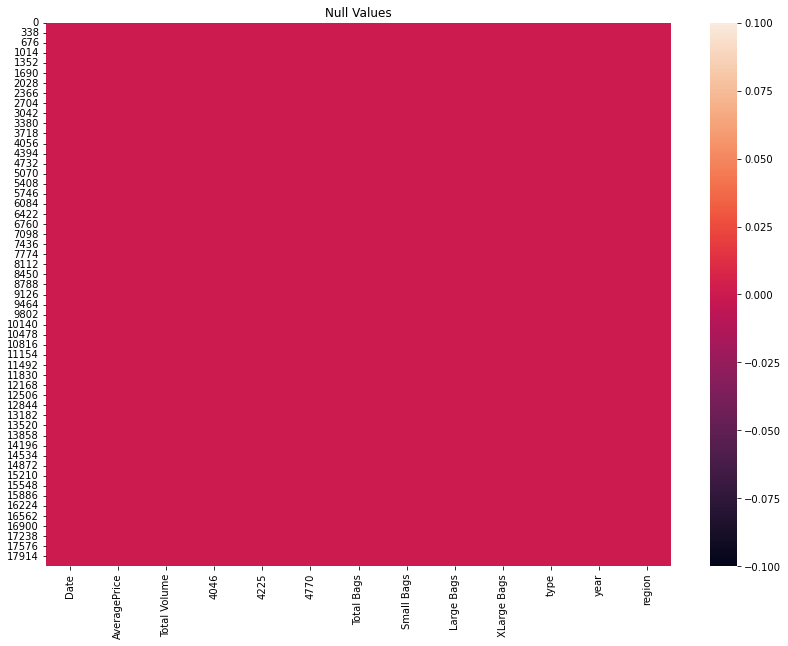

In [229]:
#Checking for null values in heat map
plt.figure(figsize=[14,10])
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

Above I am checking the null values, as find there are no null values in the data set because the red color is distributed equally correspond to each column.

In [230]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

 some of columns are highly skewed , we will treat as per requirement

In [231]:
# check statistical summary of dataset
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Above statistics data show that their multiple outliers mostly in XLargeBags There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction

Also, number of rows in each column are same, means there are no null values in the data set.
Also, the mean and 50%value of most of the column are same and the STD and mean are very close to each other.
Most of the column statistics data are near to 0 values.
By checking the difference between the 75% and max value there are outliers in some of the column, I will check it soon.

We have split column 'Date' into three new column namely Year,month,day .


In [232]:
df.shape

(18249, 13)

In [233]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [234]:
#checking the mean price of each year of Organic type of avacado
df.groupby("year")["AveragePrice"].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

In [235]:
#finding how much tye of avacado is sell in last 4 years
df.groupby("year")['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In above, I am finding that year 2017 is aggressive year where avocado price is higher as compared to other year and 2015 is at second number.

Also, I am finding that at each year present in the data set, which type of avocado is has total count, so both type of avocado is present almost in same amount in the data set.

# Data Visualisation

conventional    9126
organic         9123
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

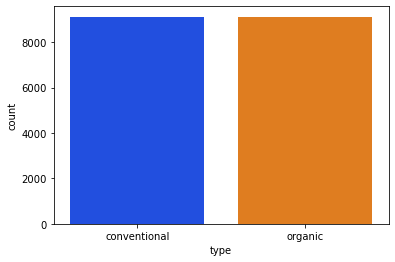

In [236]:
print(df['type'].value_counts())
sns.countplot(x='type',data=df,palette='bright')

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


<AxesSubplot:xlabel='year', ylabel='count'>

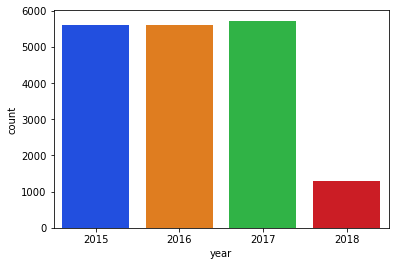

In [237]:
print(df['year'].value_counts())
sns.countplot(x='year',data=df,palette='bright')

In [238]:
df['Year'],df['month'],df['day']=df['Date'].str.split('-').str


In [240]:
df.drop(['year','Date','day'],axis=1,inplace=True)

In [241]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,02
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,01
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,01
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,01


In [242]:
df.shape

(18249, 13)

01    1944
03    1836
02    1728
10    1512
07    1512
05    1512
11    1404
08    1404
04    1404
12    1403
09    1296
06    1294
Name: month, dtype: int64


<AxesSubplot:xlabel='month', ylabel='count'>

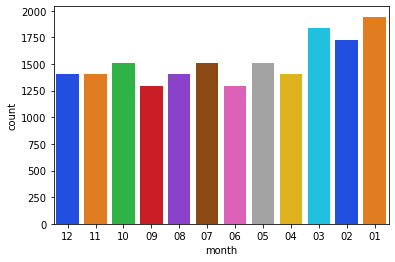

In [245]:
print(df['month'].value_counts())
sns.countplot(x='month',data=df,palette='bright')

<AxesSubplot:xlabel='Year', ylabel='AveragePrice'>

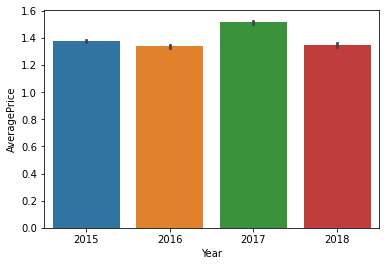

In [246]:
#checking ratio of the year and price that which year had maximum average price
sns.barplot(x="Year",y="AveragePrice",data=df)

In the abve graph showing that 2017 year had max AveragePrice 

<AxesSubplot:xlabel='month', ylabel='AveragePrice'>

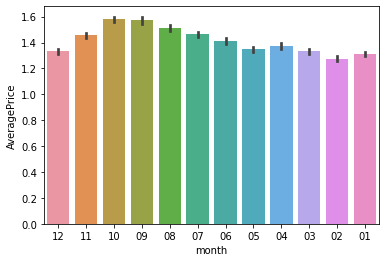

In [247]:
#checking ratio of the month and price that which year had maximum average price
sns.barplot(x="month",y="AveragePrice",data=df)

Year 2017 is that year where the price is maximum as compared to other year, and there is less difference among rest of the year.
September and October are the month where max no of average price is there, but the thing is almost for whole year the price is almost same for the avocado this prove that there is so much craze of avocado rather than India.


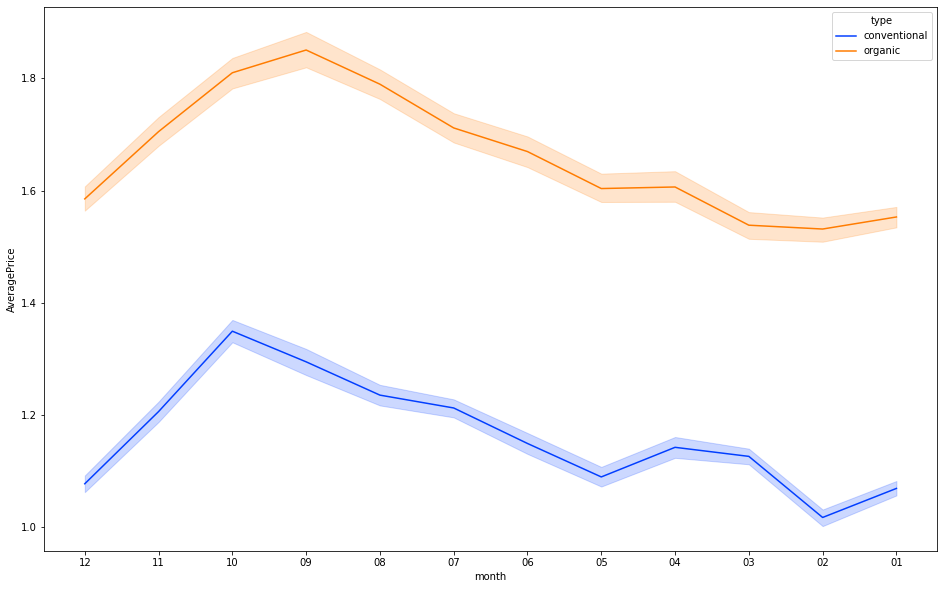

In [248]:
plt.figure(figsize=(16,10))
sns.lineplot(x="month",y="AveragePrice",palette="bright",hue="type",data=df)
plt.show()

From above graph:

There is hike between month 8–10 of both type of avocado both for conventional and organic type of avocado.
Also, the conventional type of avocado is varying in term of price as seen in line plot because in starting the price is high but then it get decrease and so on.

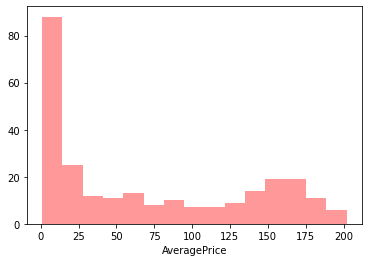

In [249]:
sns.distplot(df.AveragePrice.value_counts(),color="Red", bins= 15, kde= False)
plt.show()


In [250]:
print("Mean Average Price: ", df['AveragePrice'].mean())

print("Minimun Average Price: ", df['AveragePrice'].min())

print("Maximum Average Price: ", df['AveragePrice'].max())


Mean Average Price:  1.4059784097758825
Minimun Average Price:  0.44
Maximum Average Price:  3.25


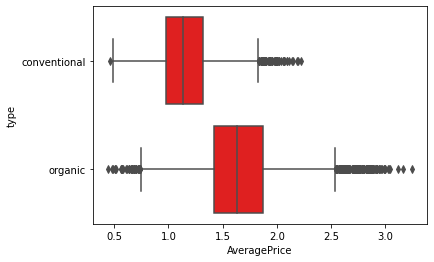

In [251]:
sns.boxplot(y="type", x="AveragePrice", color="red",data=df)
plt.show()

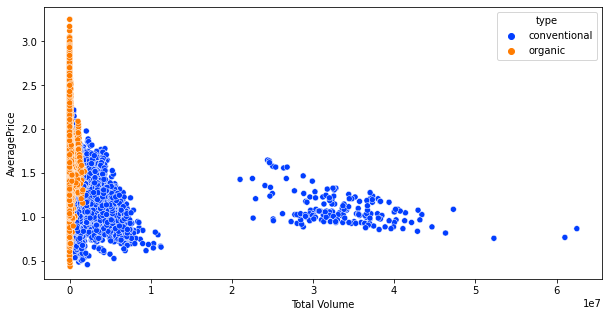

In [252]:
plt.figure(figsize= (10,5))
sns.scatterplot(x="Total Volume", y= "AveragePrice", hue= "type",palette="bright", data = df)
plt.show()

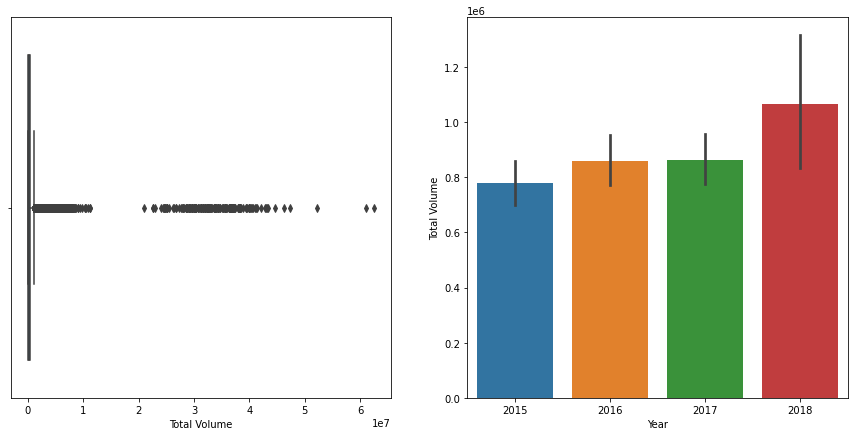

Mean Total Volume:  850644.0130089332
Minimun Total Volume:  84.56
Maximum Total Volume:  62505646.52


In [253]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.boxplot(df['Total Volume'])

plt.subplot(1,2,2)
sns.barplot(x='Year',y='Total Volume',data=df)
plt.show()

print("Mean Total Volume: ", df['Total Volume'].mean())

print("Minimun Total Volume: ", df['Total Volume'].min())

print("Maximum Total Volume: ", df['Total Volume'].max())

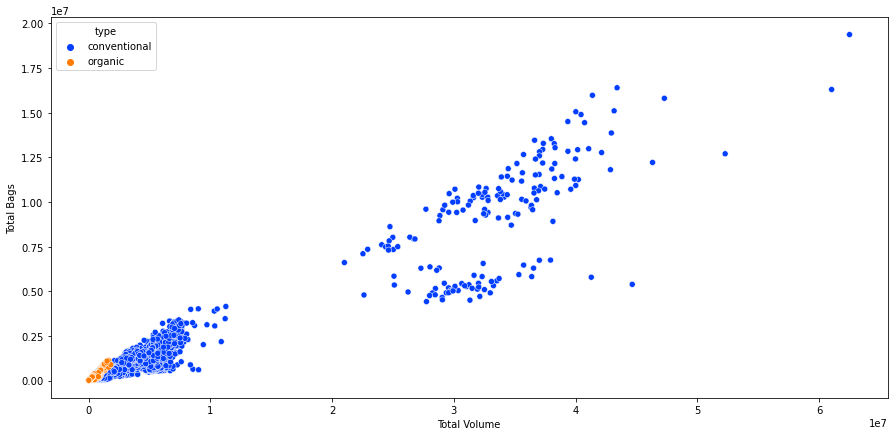

In [254]:
plt.figure(figsize= (15,7))
sns.scatterplot(x="Total Volume", y= "Total Bags", hue= "type", data = df, palette="bright")
plt.show()

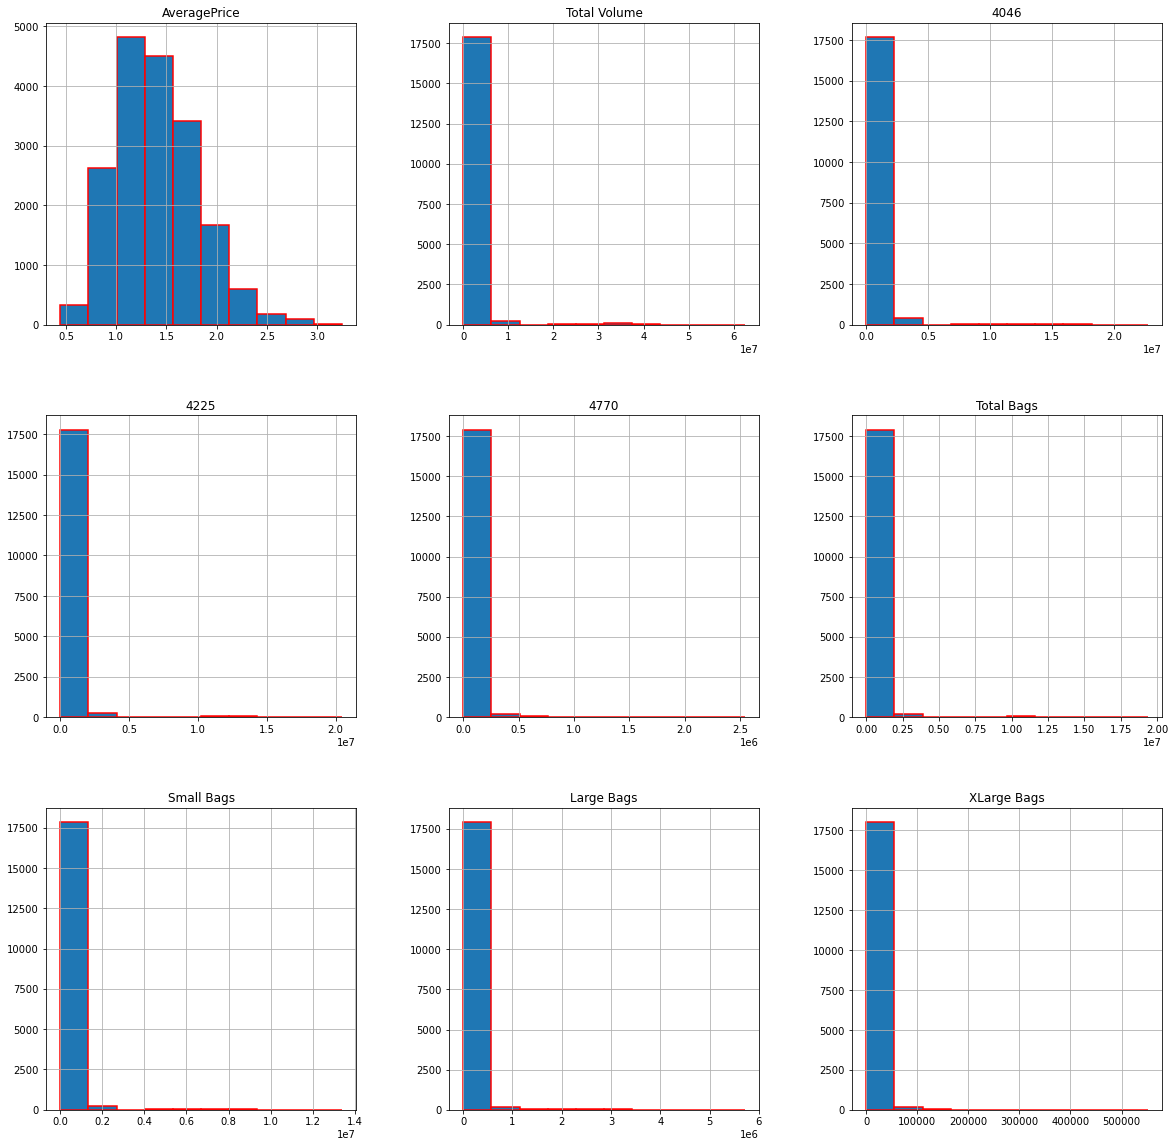

In [255]:
#plotting histogram for Univariate analysis and checking the normal distribution
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))
plt.show()

From plotting this histogram, I used the bin size as 30, we can take any bin size (suited as per as data).

Average price column is normally distributing over the histogram.
Rest of the data are not much varying in term of numbers, so they are almost left skewed data
To make the column as normal distributed we can use different methods, but I am using numPy log to make the skew values as normal distributed.


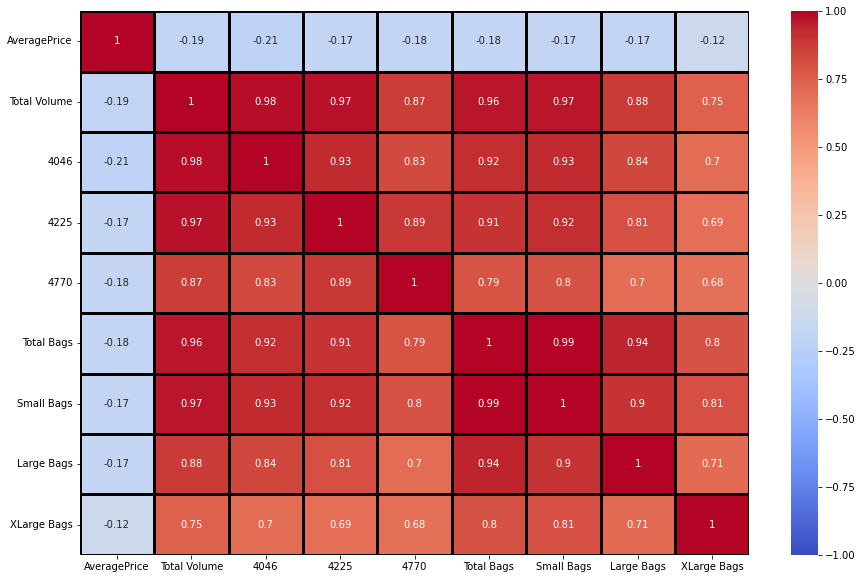

In [256]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')
plt.show()

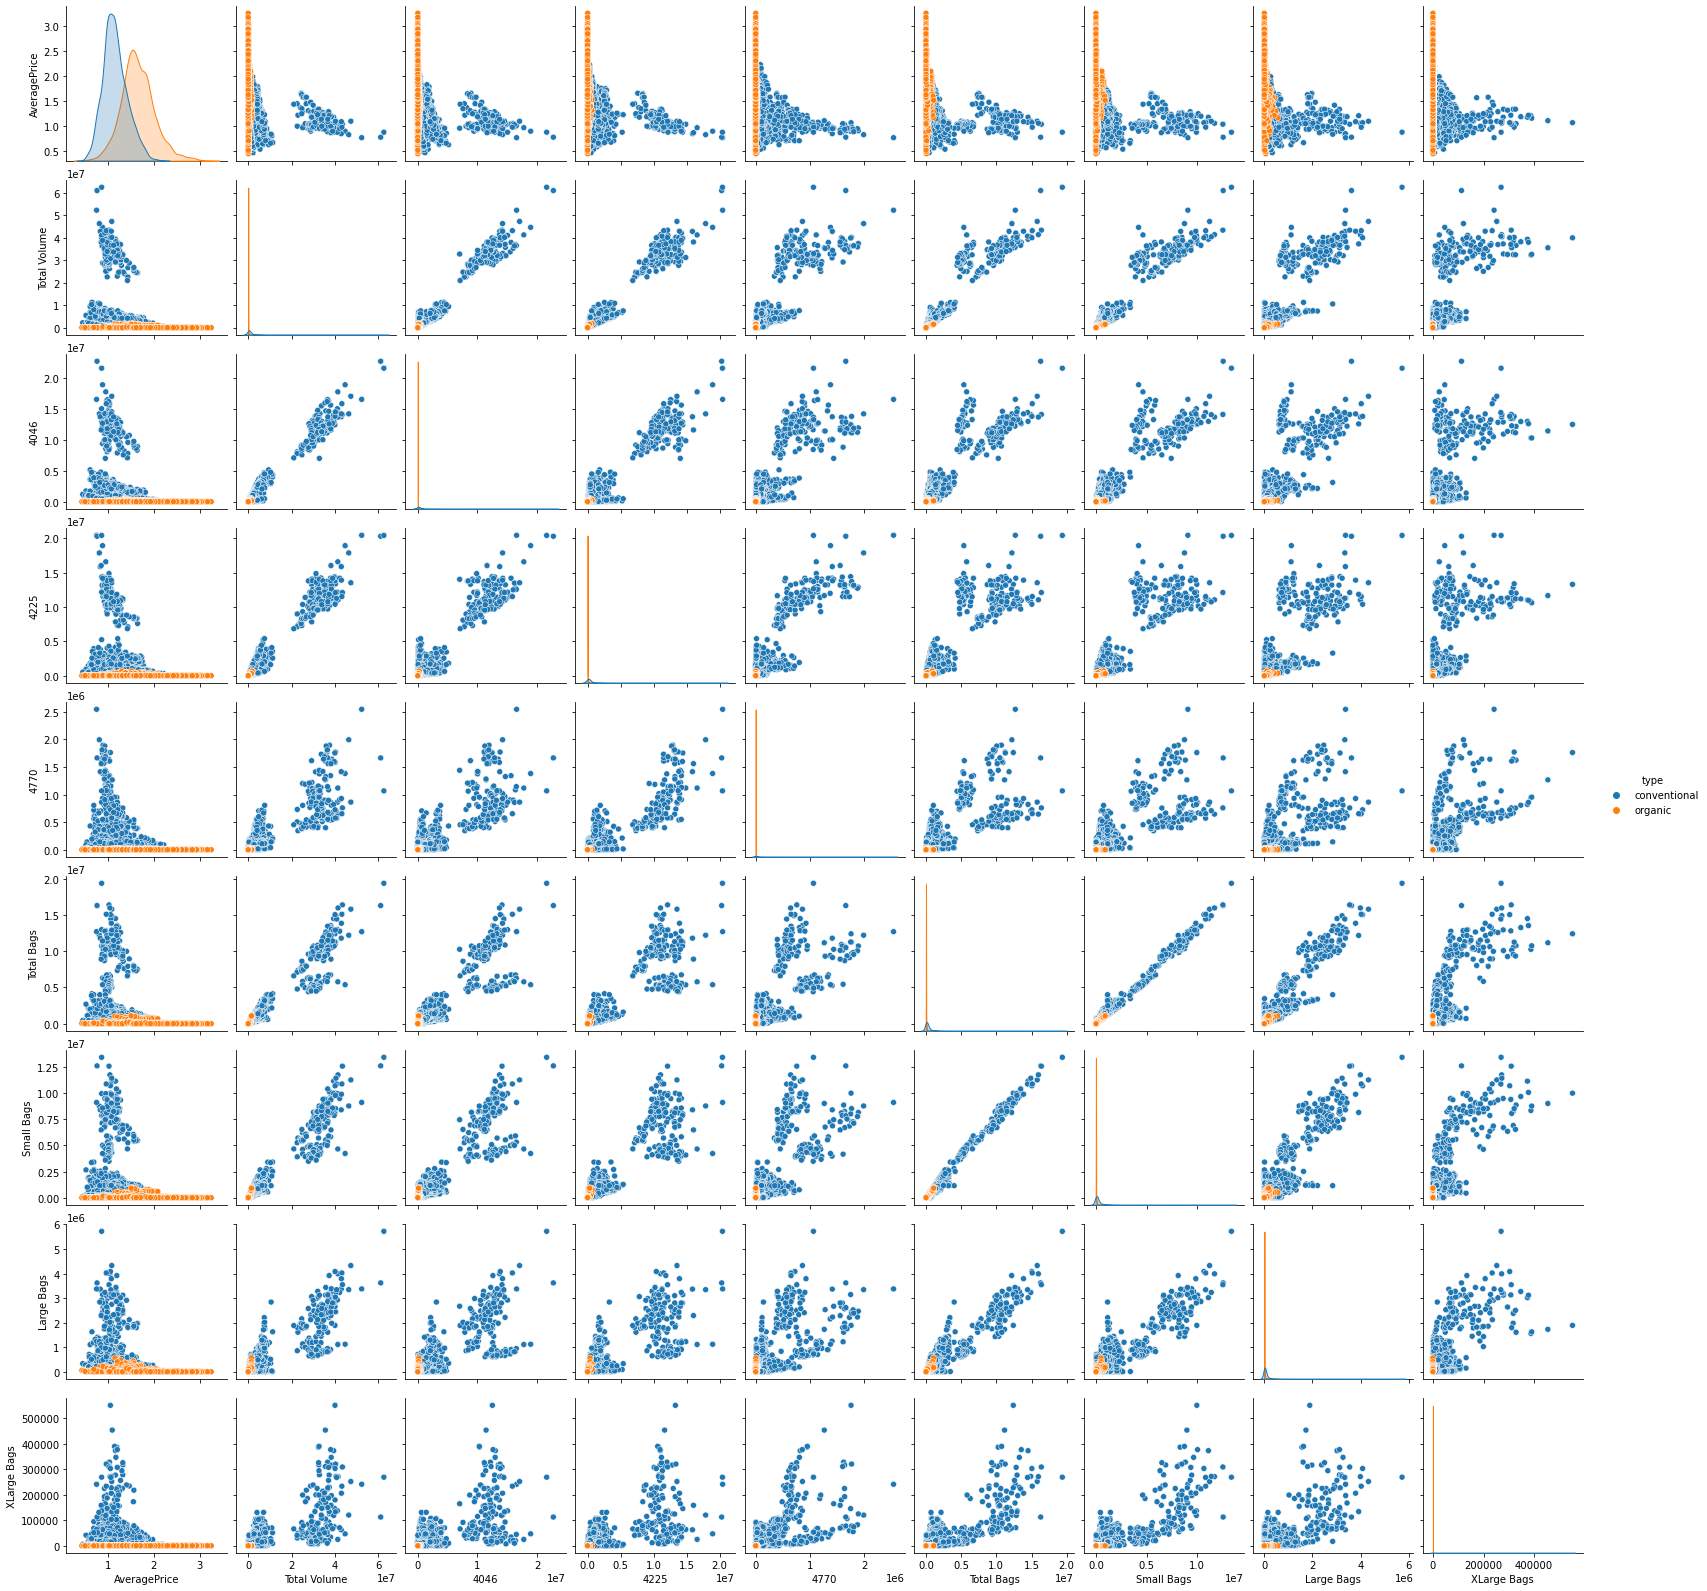

In [257]:
sns.pairplot(df, hue= "type")
plt.show()

# Data Cleaning

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  region        18249 non-null  object 
 11  Year          18249 non-null  object 
 12  month         18249 non-null  object 
dtypes: float64(9), object(4)
memory usage: 1.8+ MB


Now we have to convert Date to DateTime formate

In [262]:
df['Year']=df['Year'].astype(int)
df['month']=df['month'].astype(int)


In [263]:
# mapping months into interger type
df.month = df.month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,DEC
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,DEC
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,DEC
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,DEC
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,NOV


### Check month wise distribution of sales


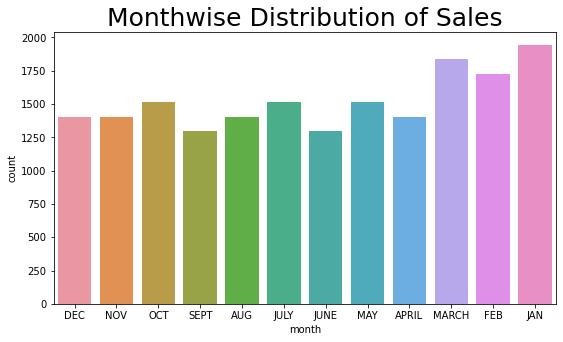

In [264]:


plt.figure(figsize=(9,5))
sns.countplot(df['month'])
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':25})
plt.show()

Here we can see in the month of Jan , Feb and March sales of Avacado is high.

### Ordinal  Encoding

In [265]:
df.drop(['4046','4225','4770','Small Bags','Large Bags','XLarge Bags'],axis=1,inplace=True)

In [266]:
oe=OrdinalEncoder()
df['type']=oe.fit_transform(df['type'].values.reshape(-1,1))
df['region']=oe.fit_transform(df['region'].values.reshape(-1,1))
df['month']=oe.fit_transform(df['month'].values.reshape(-1,1))
df


,AveragePrice,Total Volume,Total Bags,type,region,Year,month
0,1.33,64236.62,8696.87,0.0,0.0,2015,2.0
1,1.35,54876.98,9505.56,0.0,0.0,2015,2.0
2,0.93,118220.22,8145.35,0.0,0.0,2015,2.0
3,1.08,78992.15,5811.16,0.0,0.0,2015,2.0
4,1.28,51039.60,6183.95,0.0,0.0,2015,9.0
...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,53.0,2018,3.0
18245,1.71,13888.04,9264.84,1.0,53.0,2018,4.0
18246,1.87,13766.76,9394.11,1.0,53.0,2018,4.0
18247,1.93,16205.22,10969.54,1.0,53.0,2018,4.0


In [267]:
# Conventional type has been converted into 0 and Organic has been converted into 1.
df['type'].value_counts()

0.0    9126
1.0    9123
Name: type, dtype: int64

With the help of ordinalEncoder we have changed some object data to numric data as machine learning dont processed with object type data



## checking Outliers

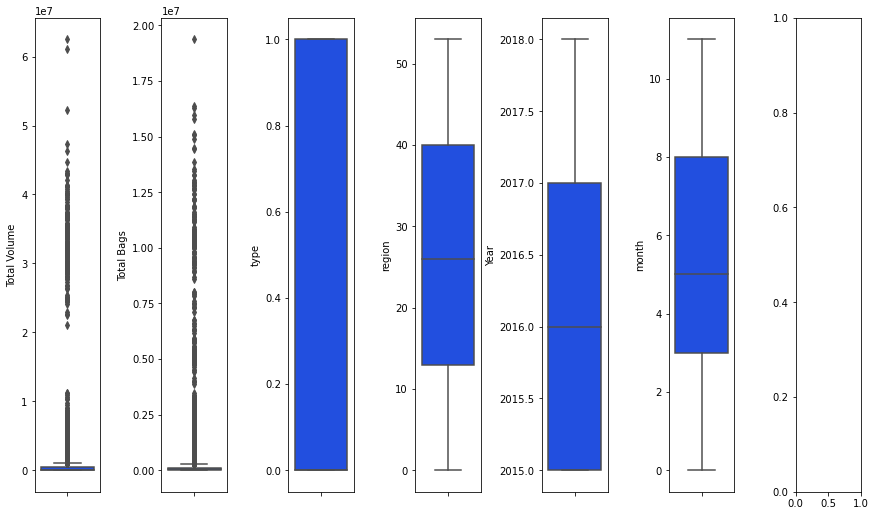

In [268]:
fig, ax = plt.subplots(ncols=7, nrows=1, figsize=(12,7))
index = 0
features = df.drop("AveragePrice", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="bright")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

In [269]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,AveragePrice,Total Volume,Total Bags,type,region,Year,month
0,0.188689,0.227716,0.234170,0.999836,1.700252,1.221282,1.030503
1,0.139020,0.230427,0.233350,0.999836,1.700252,1.221282,1.030503
2,1.182069,0.212085,0.234730,0.999836,1.700252,1.221282,1.030503
3,0.809551,0.223444,0.237096,0.999836,1.700252,1.221282,1.030503
4,0.312861,0.231538,0.236718,0.999836,1.700252,1.221282,1.060474
...,...,...,...,...,...,...,...
18244,0.556347,0.241373,0.229301,1.000164,1.700811,1.970504,0.731792
18245,0.755023,0.242296,0.233594,1.000164,1.700811,1.970504,0.433081
18246,1.152375,0.242331,0.233463,1.000164,1.700811,1.970504,0.433081
18247,1.301382,0.241625,0.231866,1.000164,1.700811,1.970504,0.433081


In [270]:
threashold=3
print(np.where(z>3))

(array([ 2652,  2652,  2653,  2653,  2654,  2654,  2655,  2655,  2656,
        2656,  2657,  2657,  2658,  2658,  2659,  2659,  2660,  2660,
        2661,  2661,  2662,  2662,  2663,  2663,  2664,  2664,  2665,
        2665,  2666,  2666,  2667,  2667,  2668,  2668,  2669,  2669,
        2670,  2670,  2671,  2671,  2672,  2672,  2673,  2673,  2674,
        2674,  2675,  2675,  2676,  2676,  2677,  2677,  2678,  2678,
        2679,  2679,  2680,  2680,  2681,  2681,  2682,  2682,  2683,
        2683,  2684,  2684,  2685,  2685,  2686,  2686,  2687,  2687,
        2688,  2688,  2689,  2689,  2690,  2690,  2691,  2691,  2692,
        2692,  2693,  2693,  2694,  2694,  2695,  2695,  2696,  2696,
        2697,  2697,  2698,  2698,  2699,  2699,  2700,  2700,  2701,
        2701,  2702,  2702,  2703,  2703,  5460,  5460,  5461,  5461,
        5462,  5462,  5463,  5463,  5464,  5464,  5465,  5465,  5466,
        5466,  5467,  5467,  5468,  5468,  5469,  5469,  5470,  5470,
        5471,  5471

In [271]:
df_new=df[(z<3).all(axis=1)]

In [272]:
df.shape,df_new.shape,
(18249-17931)/18249*100

1.7425612362321221

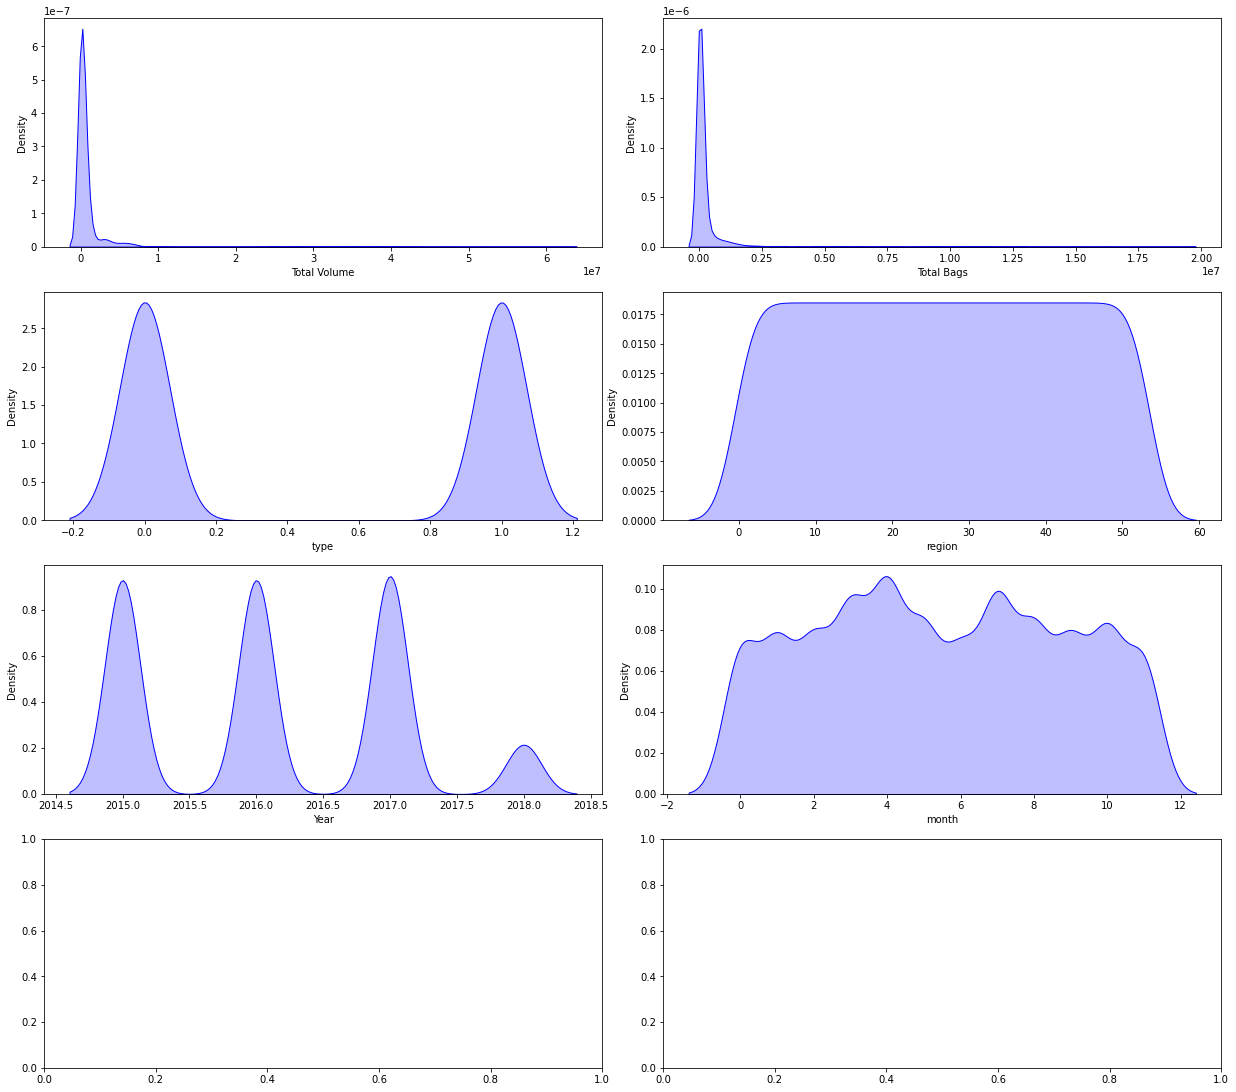

In [273]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(17,15))
index = 0
features = df.drop("AveragePrice", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="b", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

In [274]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
df.skew()

AveragePrice    0.138629
Total Volume    0.088098
Total Bags     -0.218874
type            0.000329
region          0.000030
Year            0.215339
month           0.027653
dtype: float64

### Splitting Data into Two parts namely X (Features) and Y (Label) 

In [275]:


x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']


In [276]:
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x

,Total Volume,Total Bags,type,region,Year,month
0,-0.107282,-0.494074,-0.999836,-1.700252,-1.221282,-1.030503
1,-0.175949,-0.454761,-0.999836,-1.700252,-1.221282,-1.030503
2,0.158690,-0.523041,-0.999836,-1.700252,-1.221282,-1.030503
3,-0.017121,-0.672335,-0.999836,-1.700252,-1.221282,-1.030503
4,-0.207558,-0.644845,-0.999836,-1.700252,-1.221282,1.060474
...,...,...,...,...,...,...
18244,-0.685006,-0.299689,1.000164,1.700811,1.970504,-0.731792
18245,-0.775077,-0.466102,1.000164,1.700811,1.970504,-0.433081
18246,-0.778901,-0.459975,1.000164,1.700811,1.970504,-0.433081
18247,-0.707798,-0.391424,1.000164,1.700811,1.970504,-0.433081


In [277]:
#Finding best random state to build Regression Model

maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.4939590221468506 on Random State 299


In [278]:
#Train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.25,random_state=299)

In [279]:

def reg(model,x,y):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.25,random_state=299)
    
    #model fitting
    model.fit(X_train,Y_train)
    
    #predicting the model
    pred=model.predict(X_test)
    
    
    #Mean squared error
    print('mean square error',mean_squared_error(pred,Y_test))
    
    #R2_score
    r2=r2_score(pred,Y_test,multioutput="variance_weighted")*100
    print('r2_score',r2)
    
    #cv score
    cv_score=cross_val_score(model,x,y,cv=5).mean()*100
    print('cv score ',cv_score)
    #final score 
    result=r2-cv_score
    print('final score =',result)
   
   

In [280]:
 #R2_score
r2=r2_score(pred,Y_test,multioutput="variance_weighted")*100
print('r2_score',r2)

r2_score -209.11550711153131


In [281]:
 #Random forest regressor
model=RandomForestRegressor()
reg(model,x,y)

mean square error 0.0033135644053454297
r2_score 84.96642503367656
cv score  17.210891005272458
final score = 67.7555340284041


In [282]:
#AdaBoostRegressor
model=AdaBoostRegressor()
reg(model,x,y)

mean square error 0.012844227745449254
r2_score -21.021690035762177
cv score  7.371633009225054
final score = -28.39332304498723


In [283]:
#support vector Regressor
model=SVR()
reg(model,x,y)

mean square error 0.010405525831441822
r2_score 35.21321374306211
cv score  -17.570376677906594
final score = 52.78359042096871


In [284]:
#dtr
model=DecisionTreeRegressor()
reg(model,x,y)

mean square error 0.006443875632618102
r2_score 76.16959640186562
cv score  -14.681098021919114
final score = 90.85069442378473


In [285]:
#Ridge
model=Ridge(alpha=1)
reg(model,x,y)

mean square error 0.013920860397358523
r2_score -11.55728357567165
cv score  11.31280122085961
final score = -22.87008479653126


In [286]:
#Lasso
model=Lasso(alpha=1)
reg(model,x,y)

mean square error 0.027511411507131146
r2_score -2.2319908678489992e+32
cv score  -103.77105535400972
final score = -2.2319908678489992e+32


In [287]:
#XGBRegressor
model=XGBRegressor()
reg(model,x,y)

mean square error 0.0027610239046595405
r2_score 88.35171132001985
cv score  44.578345618703786
final score = 43.77336570131606


In [288]:
# Hyper parameter tuning for best ML model

#XGBRegressor
fmod_param={'n_estimators' : [200, 400, 600],
              'gamma' : [2.0, 3.0, 4.0],
              'max_depth' : [4, 6, 8],
              'n_jobs' : [-2, -1, 1]
             }

In [289]:
GSCV=GridSearchCV(XGBRegressor(),fmod_param,cv=5)

In [290]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,


In [291]:
GSCV.best_score_

0.5827520817142057

In [292]:
GSCV.best_params_

{'gamma': 2.0, 'max_depth': 8, 'n_estimators': 200, 'n_jobs': -2}

In [293]:
Final_Model = XGBRegressor(gamma=2.0, max_depth=8, n_estimators=200, n_jobs=-2)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 61.55427846461262


In [294]:
#Saving our model

filename='avacado.pickle'
pickle.dump(Final_Model,open(filename,'wb'))

# Prediction with Region

In [295]:
# import liberary for classifcation prediction
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier


In [296]:
#assign the value of x and y for training and testing phase
x_c=df.drop(columns=['region','month'])
y_c=df[["region"]]
print(x_c.shape)
print(y_c.shape)

(18249, 5)
(18249, 1)


In [298]:
#standarise the data so the mean will be 0
sc= StandardScaler()
sc.fit_transform(x_c)
x_c=pd.DataFrame(x_c,columns=x_c.columns)


In [302]:
#finding the best algorithm for dataset
model=[DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score=0
for r_state in range(40,90):
    train_xc,test_xc,train_yc,test_yc=train_test_split(x_c,y_c,random_state=r_state,test_size=0.33)
    for i_c in model:
        i_c.fit(train_xc,train_yc)
        pre_c=i_c.predict(test_xc)
        ac_score=accuracy_score(test_yc,pre_c)
        print("accuracy score correspond to random state",r_state,"is", ac_score)
        if ac_score>max_accuracy_score:
            max_accuracy_score=ac_score
            final_state=r_state
            final_model=i_c
print()
print()
print()
print()


print("max accuracy score correspond to random state",final_state,"is",max_accuracy_score,"and model is ",final_model)

accuracy score correspond to random state 40 is 0.43333886767391666
accuracy score correspond to random state 40 is 0.4753445127013116
accuracy score correspond to random state 41 is 0.44911173833637724
accuracy score correspond to random state 41 is 0.4939398970612652
accuracy score correspond to random state 42 is 0.4414743483313963
accuracy score correspond to random state 42 is 0.48314793292379216
accuracy score correspond to random state 43 is 0.43981404615640046
accuracy score correspond to random state 43 is 0.47750290552880625
accuracy score correspond to random state 44 is 0.4474514361613814
accuracy score correspond to random state 44 is 0.4843101444462892
accuracy score correspond to random state 45 is 0.44213846920139466
accuracy score correspond to random state 45 is 0.47849908683380377
accuracy score correspond to random state 46 is 0.4512701311638718
accuracy score correspond to random state 46 is 0.4869666279262826
accuracy score correspond to random state 47 is 0.43831

In [303]:
#finding the best parameter for prediction of KNeighborsClassifier using GridSearchCV


train_xc,test_xc,train_yc,test_yc=train_test_split(x_c,y_c,random_state= 76,test_size=0.33)
KNC=KNeighborsClassifier()
parameters={"n_neighbors":range(1,30)}
gridsearch= GridSearchCV(KNC,parameters)
gridsearch.fit(train_xc,train_yc)
gridsearch.best_params_
    

{'n_neighbors': 1}

In [306]:
KNC=KNeighborsClassifier(n_neighbors=1)
KNC.fit(train_xc,train_yc)
predc = KNC.predict(test_xc)
acu_score=accuracy_score(test_yc,pre_c)
print("Accuracy score :",ac_score*100)

Accuracy score : 48.298190270629256


In [310]:
#calculating the score of dfferent parameter
score = cross_val_score(KNC,x_c,y_c,cv=100,scoring="accuracy").mean()
print("cross val score:", score*100)



cross val score: 46.39110070257612


In prediction:

Here the random state that is occurring is 78which provide the best accuracy score for the model which is 49%.
Also, by using the GridSeachCV I am able to find the best param and then find the best accuracy score that is 46.39%

#### ROC Curve


In [311]:
pred_prob=KNC.predict_proba(test_xc)[:,1]
pred_prob


array([0., 0., 0., ..., 0., 0., 0.])

In [313]:
fpr,tpr,threashold=roc_curve(test_yc,pred_prob,pos_label=True)

In [315]:
print(fpr)
print("\n")
print(tpr)
print("\n")
print(threashold)

[0.         0.01285521 1.        ]


[0.         0.32432432 1.        ]


[2. 1. 0.]


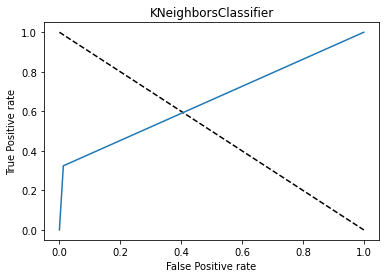

In [317]:
#plotting graph for ROC
plt.plot([0,1],[1,0],"k--")
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("KNeighborsClassifier")
plt.show()

Observation:

Taking price as y variable is predicting well for this model as compare to region
Also, I used the Label Encoder to make the categorical data into numeric data i.e. Region and Sex
Also, R2 score value is also greater then accuracy score
Average price, total bags and total volume is well normally distributed data among all other column
There are no outliers in the data set after replacing it through mean value
As year is most negative co related column among all columns
In between August to October the price of avocado is much higher as compared to other months
Date 28,29 and 30 the price of avocado is high
Hartford Springfield, San Francisco and New York are having more average price as compared to another region
There is hike between month 8-10 of both type of avocado
As organic type of avocado is having the more price per unit then conventional
I had done prediction using region and price but using price the prediction score is high as compared to region
So in this data set I am using both regression and classification technique for making this model